In [1]:
from IPython.display import Image


### Solution Problem 1: History of Easter Island 

#### Answers to question 1,2,3

To capture the mysterious dynamics of Easter Island, with three state variables: Humans (H), Trees(T) and Rat(R), I explore a model which will have the following interactions between and within the three state variables:

- <b>Trees</b> : As clear frrom the reading the human population and the rat population are the primary factors causing decrease in the amount of the trees. But, Humans directly harvest trees while rats cause decrease in fertility. To put this difference into the model I build the model where rats eating the seeds of the tress effects the growth rate of trees represented by $g/(1+fR)$ in model. The $1+fR$ term in the denominator means in absence of rats (R=0) the trees would grow depending only on their natural growth rate $g$. Further, The growth rate of trees will also be logistic growth Dependent on the carrying capacity of the environment $E$. The humans decreasing trees by harvesting is modelled by parameter $h$ showing direct effect of harvesting density dependent on the population of humans. I do not model the effect of trees dying due to a natural cause assuming this time would be long and a tree would be harvested before it can reach this age.

- <b>Humans</b> : I assume that the main resources available for the human population to survive comes from the trees. To keep the model simple, main resources available survival and growth for human come from trees and the human population growth will be a logistic equation, in which the carrying capacity is the population of trees. The humans also can interact with the rat population for example by trying to eradicating disease caused by palge or any other competiton with the rat population. I model this interaction as with parameter $e$ density dependent on the population of rats but do not effect the human survival directly. This allows me to set $e=0$ to model no interaction between human and rats. The humans also have a natural growth rate $b$.

- <b>Rats</b> : Similar to the human population the rat population will have a natural growth rate $r$. As discussed earlier they will intteract with humans which is modelled by $e$. Finally, the growth rate for their polulation is modelled as a logistic growth where the carrying capacity is dependent on the population of the trees.

All intercation prameters discussed above g(growth rate of trees),f(de-fertilization of trees caused by rats),h(human harvest of trees),E(carying capacity of environment with respect to trees),e(eradication of rat population),b(growth rate of humans,r(growth rate of rats) are the model parameters in my model. Further all these parameters are positive and real valued. The figure below represents the diagram schematics of this model.  
![title](model.png)

Using the pictorical representation above of the model, we can write the complete set of differential equations for the model as follows: 

   \begin{equation} \frac{dP}{dt}=bP\left(1-\frac{P}{T}\right)\end{equation}
   
   \begin{equation} dTdt=\frac{g}{1+fR}T\left(1-\frac{T}{E}\right)-hP \end{equation}
   
   \begin{equation} dRdt=rR\left(1-\frac{R}{T}\right)-eR\end{equation}









#### Python Code and Numerical Solution

In [2]:
from scipy.integrate import odeint
import numpy as np
import matplotlib . pyplot as plt
%matplotlib inline

In [3]:
# as given in the questions we use the following initial conditions

p0=50       #Initial population Polynesians(humans) on island
r0=10       #Initial Population Rats on island
t0=8000000  #Initial number of palm trees on island
#make a initial condition vector to pass into odeint function
y0=[p0,t0,r0]

In [4]:
# parameters and growth functions

E = 8200000   #  assuming the environmentt was almostt on its carrrying capacity initially   
b = 0.05      # growth rate of humans assuming net increase growth of 5% each year
r= 10         # growth rate of rats rodents grow fast!!!
g= 1        # growth rate for trees asuming naturally trees can double each year 
f = 0.1    # rate with wich rats effect fertilization of trees assuming one percent of total palm seeds consumed by rats
h = 0.25    #assuming 25 percent of trees are harvested by humans
e = 0       # humans do not interact with rats 

 
    
# we also need to define the growth function of the trees which is dependent on the Rat population aat each time step

def fg(Rt):
    return (g/(1+f*Rt))


In [5]:
# differential equation function
def easter_island_model(y,t):
    P,T,R = y
    dpdt= b*P*(1-(P/T))
    dTdt= fg(R)*T*(1-(T/E))-(h*P)
    dRdt= r*R*(1-(R/T))-(e*R)
   
    return [dpdt,dTdt,dRdt] 

In [6]:
#timeline to observe the model
t= np.linspace(0,500,1000)

In [7]:
# call odeint to integrate and find solutions:
y=odeint(easter_island_model,y0,t)

/anaconda3/lib/python3.7/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


Text(0.5, 1, 'Results Easter Island model (without human-rat interaction)')

/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


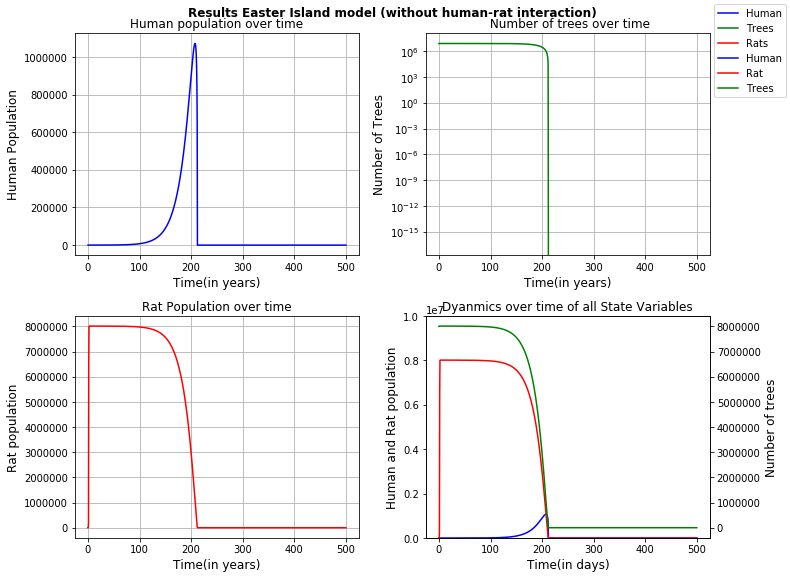

In [8]:
# four pannel plots for state variables  (N, C, R, and B) over time 
# extract solutions
P_soln = y[:,0]
T_soln = y[:,1]
R_soln = y[:,2]

# make a figure to store graphs
fig = plt.figure()

ax1 = plt.subplot(2,2,1)
ax1.plot(t,P_soln,'b',label = 'Human')
ax1.set_xlabel('Time(in years)',fontsize=12)
ax1.set_ylabel('Human Population',color='k',fontsize=12)
ax1.set_title('Human population over time')
plt.grid()


ax2 = plt.subplot(2,2,2)
ax2.semilogy(t,T_soln,'g',label = 'Trees')
#ax2.set_ylim(1,10**2)
ax2.set_xlabel('Time(in years)',fontsize=12)
ax2.set_ylabel('Number of Trees',color='k',fontsize=12)
ax2.set_title(' Number of trees over time')
plt.grid()


ax3 = plt.subplot(2,2,3)
ax3.plot(t,R_soln,'r',label = 'Rats')
ax3.set_xlabel('Time(in years)',fontsize=12)
ax3.set_ylabel('Rat population',color='k',fontsize=12)
ax3.set_title('Rat Population over time')
plt.grid()

ax4 = plt.subplot(2,2,4)
ax4.plot(t,P_soln,'b',label='Human')
ax4.plot(t,R_soln,'r',label='Rat')
ax5 = ax4.twinx()
ax5.plot(t,T_soln,'g',label='Trees')
ax4.set_ylim(10**4,10**7) 
ax4.set_xlabel('Time(in days)',fontsize=12)                
ax4.set_ylabel('Human and Rat population',color='k',fontsize=12) 
ax5.set_ylabel('Number of trees',color='k',fontsize=12) 
ax4.set_title('Dyanmics over time of all State Variables')



fig.legend()
fig.set_tight_layout(True) 
#Set the figure size so that all four panel graphs are clearly visible
fig.set_size_inches(11,8)   
#Set a title for the figure
fig.suptitle('Results Easter Island model (without human-rat interaction)',y=1,fontsize=12,fontweight='bold')

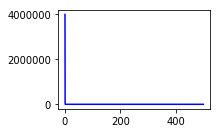

In [9]:
ax4 = plt.subplot(2,2,4)
rate_rat=[fg(i)*j for i,j in zip (R_soln,T_soln)]
ax4.plot(t,rate_rat,'b',label='rate')

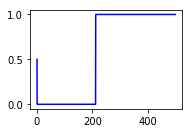

In [10]:
ax4 = plt.subplot(2,2,4)
rate_rat=[fg(i) for i in R_soln]
ax4.plot(t,rate_rat,'b',label='rate')

In [11]:
# new parameters and growth functions

E= 8200000   # carying capacity of the island environment 
b = 0.05      # growth rate of humans assuming net increase growth of 5% each year
r = 10         # growth rate of rats  rodents grow fast!!!
g= 1        # growth rate for trees asuming naturally trees can double each year 
f = 0.1    # rate with wich rats effect fertilization of trees 
h = 0.25    #assuming 25 percent of trees are harvested by humans
e = 4       # humans eradicate rats in but not strongly manner.  



In [12]:
y=odeint(easter_island_model,y0,t)

Text(0.5, 1, 'Results Easter Island model (e=4)')

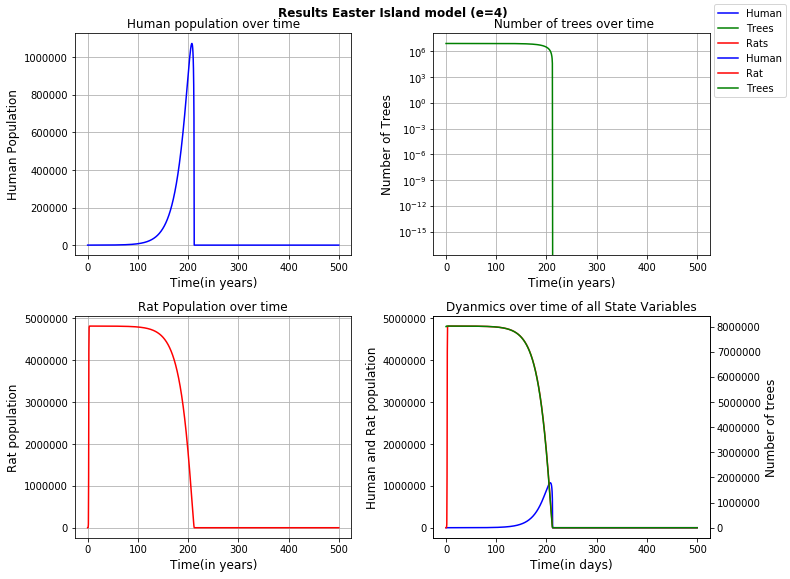

In [13]:
# four pannel plots for state variables  (N, C, R, and B) over time 
# extract solutions
P_soln = y[:,0]
T_soln = y[:,1]
R_soln = y[:,2]

# make a figure to store graphs
fig = plt.figure()

ax1 = plt.subplot(2,2,1)
ax1.plot(t,P_soln,'b',label = 'Human')
ax1.set_xlabel('Time(in years)',fontsize=12)
ax1.set_ylabel('Human Population',color='k',fontsize=12)
ax1.set_title('Human population over time')
plt.grid()


ax2 = plt.subplot(2,2,2)
ax2.semilogy(t,T_soln,'g',label = 'Trees')
#ax2.set_ylim(1,10**2)
ax2.set_xlabel('Time(in years)',fontsize=12)
ax2.set_ylabel('Number of Trees',color='k',fontsize=12)
ax2.set_title(' Number of trees over time')
plt.grid()


ax3 = plt.subplot(2,2,3)
ax3.plot(t,R_soln,'r',label = 'Rats')
ax3.set_xlabel('Time(in years)',fontsize=12)
ax3.set_ylabel('Rat population',color='k',fontsize=12)
ax3.set_title('Rat Population over time')
plt.grid()

ax4 = plt.subplot(2,2,4)
ax4.plot(t,P_soln,'b',label='Human')
ax4.plot(t,R_soln,'r',label='Rat')
ax5 = ax4.twinx()
ax5.plot(t,T_soln,'g',label='Trees')
ax4.set_xlabel('Time(in days)',fontsize=12)                
ax4.set_ylabel('Human and Rat population',color='k',fontsize=12) 
ax5.set_ylabel('Number of trees',color='k',fontsize=12) 
ax4.set_title('Dyanmics over time of all State Variables')



fig.legend()
fig.set_tight_layout(True) 
#Set the figure size so that all four panel graphs are clearly visible
fig.set_size_inches(11,8)   
#Set a title for the figure
fig.suptitle('Results Easter Island model (e=4)',y=1,fontsize=12,fontweight='bold')

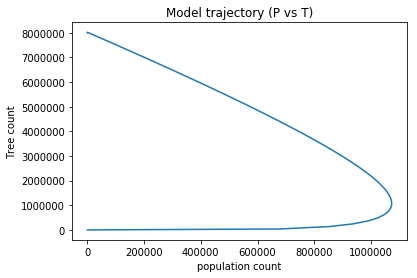

In [14]:
fig2=plt.figure()
ax2=plt.subplot(1,1,1)
ax2.plot(P_soln,T_soln,label='Phase')
plt.xlabel('population count')
plt.ylabel('Tree count')
plt.title('Model trajectory (P vs T)') 
plt.show()

Text(0, 0.5, 'Growth function of tress')

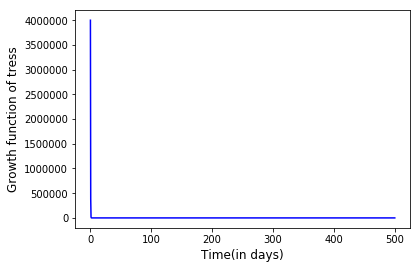

In [16]:
ax4 = plt.subplot(1,1,1)
rate_rat=[fg(i)*j for i,j in zip (R_soln,T_soln)]
ax4.plot(t,rate_rat,'b',label='rate')
ax4.set_xlabel('Time(in days)',fontsize=12)                
ax4.set_ylabel('Growth function of tress',color='k',fontsize=12)

Text(0, 0.5, 'Growth function of tress')

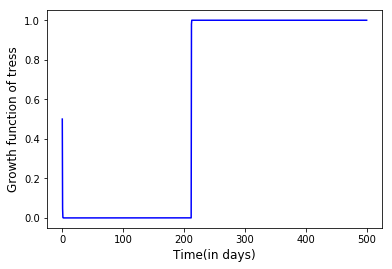

In [17]:
ax4 = plt.subplot(1,1,1)
rate_rat=[fg(i) for i  in R_soln]
ax4.plot(t,rate_rat,'b',label='rate')
ax4.set_xlabel('Time(in days)',fontsize=12)                
ax4.set_ylabel('Growth function of tress',color='k',fontsize=12)

In [18]:
# new parameters and growth functions
E= 8200000   # carying capacity of the island environment 
b = 0.05      # growth rate of humans assuming net increase growth of 5% each year
r = 10         # growth rate of rats  rodents grow fast!!!
g= 1        # growth rate for trees asuming naturally trees can double each year 
f = 0.01    # rate with wich rats effect fertilization of trees assuming ten percent of total palm seeds consumed by rats
h = 0.25    #assuming 25 percent of trees are harvested by humans
e = 11      # humans eradicate rats strongly cause extinsion earlier!!





In [19]:
y=odeint(easter_island_model,y0,t)

Text(0.5, 1, 'Results Easter Island model (e=11)')

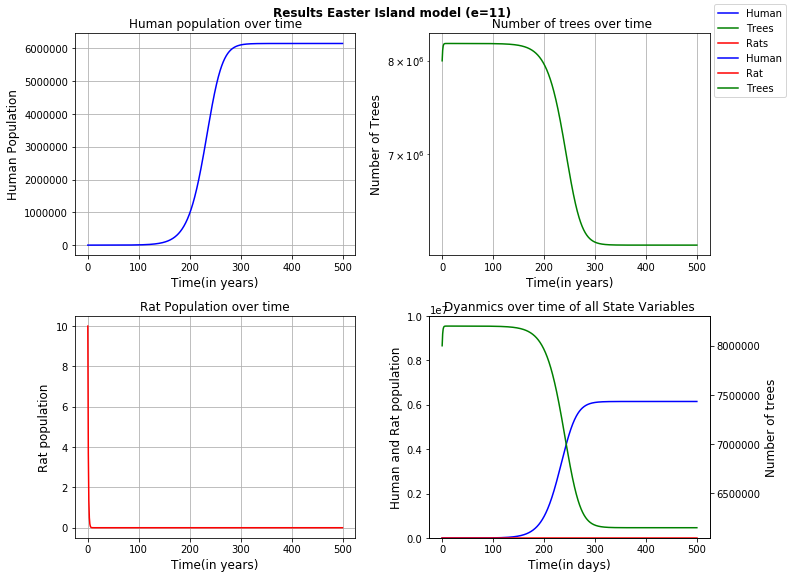

In [20]:
# four pannel plots for state variables  (N, C, R, and B) over time 
# extract solutions
P_soln = y[:,0]
T_soln = y[:,1]
R_soln = y[:,2]

# make a figure to store graphs
fig = plt.figure()

ax1 = plt.subplot(2,2,1)
ax1.plot(t,P_soln,'b',label = 'Human')
ax1.set_xlabel('Time(in years)',fontsize=12)
ax1.set_ylabel('Human Population',color='k',fontsize=12)
ax1.set_title('Human population over time')
plt.grid()


ax2 = plt.subplot(2,2,2)
ax2.semilogy(t,T_soln,'g',label = 'Trees')
#ax2.set_ylim(1,10**2)
ax2.set_xlabel('Time(in years)',fontsize=12)
ax2.set_ylabel('Number of Trees',color='k',fontsize=12)
ax2.set_title(' Number of trees over time')
plt.grid()


ax3 = plt.subplot(2,2,3)
ax3.plot(t,R_soln,'r',label = 'Rats')
ax3.set_xlabel('Time(in years)',fontsize=12)
ax3.set_ylabel('Rat population',color='k',fontsize=12)
ax3.set_title('Rat Population over time')
plt.grid()

ax4 = plt.subplot(2,2,4)
ax4.plot(t,P_soln,'b',label='Human')
ax4.plot(t,R_soln,'r',label='Rat')
ax5 = ax4.twinx()
ax5.plot(t,T_soln,'g',label='Trees')
ax4.set_ylim(10**4,10**7) 
ax4.set_xlabel('Time(in days)',fontsize=12)                
ax4.set_ylabel('Human and Rat population',color='k',fontsize=12) 
ax5.set_ylabel('Number of trees',color='k',fontsize=12) 
ax4.set_title('Dyanmics over time of all State Variables')



fig.legend()
fig.set_tight_layout(True) 
#Set the figure size so that all four panel graphs are clearly visible
fig.set_size_inches(11,8)   
#Set a title for the figure
fig.suptitle('Results Easter Island model (e=11)',y=1,fontsize=12,fontweight='bold')

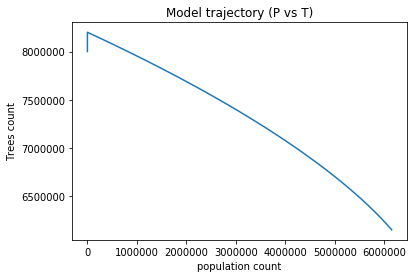

In [21]:
fig2=plt.figure()
ax2=plt.subplot(1,1,1)
ax2.plot(P_soln,T_soln,label='Phase')
plt.xlabel('population count')
plt.ylabel('Trees count')
plt.title('Model trajectory (P vs T)') 
plt.show()

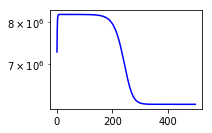

In [22]:
ax4 = plt.subplot(2,2,4)
rate_rat=[fg(i)*j for i,j in zip (R_soln,T_soln)]
ax4.semilogy(t,rate_rat,'b',label='rate')

Text(0, 0.5, 'Growth function of tress')

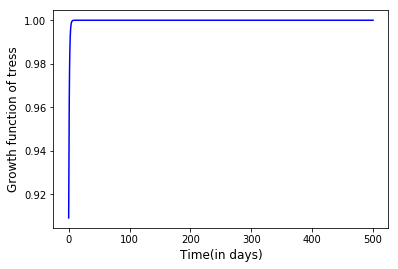

In [24]:
ax4 = plt.subplot(1,1,1)
rate_rat=[fg(i) for i in R_soln]
ax4.plot(t,rate_rat,'b',label='rate')
ax4.set_xlabel('Time(in days)',fontsize=12)                
ax4.set_ylabel('Growth function of tress',color='k',fontsize=12)